# Coding 1: Analysis of Mobile Phones

Kim Audrey Magan | 3/29/2025

---
## Context:
This notebook will contain an exploratory data analysis of a Kaggle dataset uploaded by **Seyar Hariri**. The dataset contains records of mobile phones relased from 2014 to 2015 by different companies.

To provide some context, the raw dataset has following columns:
- `Company Name`
- `Model Name`
- `Mobile Weight`
- `RAM`
- `Front Camera`
- `Back Camera`
- `Processor`
- `Battery Capacity`
- `Screen Size`
- `Launched Price (Pakistan)`
- `Launched Price (India)`
- `Launched Price (China)`
- `Launched Price (USA)`
- `Launched Price (Dubai)`
- `Launched Year`

## Questions:
The following questions will be the guide throughout this analysis and where the analysis will try to answer:
1. How much are each country paying for an Iphone in terms of USD from 2014 to 2024?
2. Which company provides the best battery capacity and how much do they cost?

## Processing:
The raw data has no integrity yet as it is dirty and therefore this phase will focus on cleaning the data for easier analysis.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [25]:
df = pd.read_csv('datasets/mobile_dataset.csv', encoding='unicode_escape')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [26]:
# Clean the column names
df.columns = [col.lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Lowercase string values
string_columns = list(df.columns[0:7])
df[string_columns] = df[string_columns].apply(lambda col: col.str.lower())

# Clean the numeric data
symbolRe = re.compile(r"[^0-9\.]")
for i in range(9, 14):
    df.iloc[:, i] = [0.0 if val == '' or symbolRe.sub('', val) == '' else float(symbolRe.sub('', val)) for val in df.iloc[:, i]]
df['mobile_weight'] = [float(symbolRe.sub('', val)) for val in df['mobile_weight']]
df['ram'] = [12 if val == '8GB / 12 GB' else float(symbolRe.sub('', val)) for val in df['ram']]
df['battery_capacity'] = [float(symbolRe.sub('', val)) for val in df['battery_capacity']]

# Copy the cleaned dataframe so that you have a spare
df_copy = df.copy()

# If you want to save the cleaned data to csv, uncomment the line below
# df.to_csv('mobile_phones.csv', index = False)
df.head()

,company_name,model_name,mobile_weight,ram,front_camera,back_camera,processor,battery_capacity,screen_size,launched_price_pakistan,launched_price_india,launched_price_china,launched_price_usa,launched_price_dubai,launched_year
0,apple,iphone 16 128gb,174.0,6.0,12mp,48mp,a17 bionic,3600.0,6.1 inches,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,apple,iphone 16 256gb,174.0,6.0,12mp,48mp,a17 bionic,3600.0,6.1 inches,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,apple,iphone 16 512gb,174.0,6.0,12mp,48mp,a17 bionic,3600.0,6.1 inches,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,apple,iphone 16 plus 128gb,203.0,6.0,12mp,48mp,a17 bionic,4200.0,6.7 inches,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,apple,iphone 16 plus 256gb,203.0,6.0,12mp,48mp,a17 bionic,4200.0,6.7 inches,259999.0,94999.0,6499.0,949.0,3399.0,2024


In [27]:
# Drop unnecessary columns for the analysis
df.drop(columns=list(df.columns[1:9]), inplace=True)

In [28]:
# Sort the values
df.sort_values('launched_year', inplace = True, ascending = False)

In [29]:
df.head(3)

,company_name,launched_price_pakistan,launched_price_india,launched_price_china,launched_price_usa,launched_price_dubai,launched_year
922,poco,64999.0,22999.0,2199.0,329.0,1199.0,2025
460,realme,94999.0,34999.0,2600.0,340.0,1250.0,2025
461,realme,99999.0,36999.0,2800.0,360.0,1320.0,2025


In [30]:
df.tail(3)

,company_name,launched_price_pakistan,launched_price_india,launched_price_china,launched_price_usa,launched_price_dubai,launched_year
181,samsung,28000.0,8499.0,799.0,99.0,399.0,2016
251,vivo,29999.0,16999.0,1299.0,199.0,699.0,2014
255,vivo,19999.0,10999.0,899.0,139.0,499.0,2014


## Answering Q1:

### 1. How much are each country paying for an Apple Phone in USD from 2023 to 2024?

In [31]:
# Subset Apple Products
apple_df = df.groupby('company_name').get_group('apple')

In [32]:
apple_df.head()

,company_name,launched_price_pakistan,launched_price_india,launched_price_china,launched_price_usa,launched_price_dubai,launched_year
2,apple,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,apple,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,apple,259999.0,94999.0,6499.0,949.0,3399.0,2024
5,apple,274999.0,104999.0,6999.0,999.0,3599.0,2024
6,apple,284999.0,99999.0,6999.0,999.0,3499.0,2024


In [33]:
# Ignore (another possible way):
# apple_df.groupby('launched_year')['launched_price_china'].mean()

# Create a pivot table
price_columns = list(apple_df.columns[1:6])

# Melt the DataFrame
df_melted = pd.melt(apple_df,
                    id_vars=['company_name', 'launched_year'],
                    value_vars=price_columns,
                    var_name='country',
                    value_name='price')

# Create the pivot table with average price per year
pivot_table = df_melted.pivot_table(index=['company_name','country'],
                                    columns='launched_year',
                                    values='price',
                                    aggfunc='mean')

In [34]:
# Round the values
for i in pivot_table.columns:
    pivot_table[i] = pivot_table[i].apply(lambda x: round(x, 2))

In [35]:
pivot_table.columns.name = None
pivot_table.reset_index(inplace = True)
pivot_table

,company_name,country,2017,2018,2019,2020,2021,2022,2023,2024
0,apple,launched_price_china,8588.0,9091.67,6562.64,7143.44,6999.00,6899.00,6882.33,6932.33
1,apple,launched_price_dubai,3999.0,4054.56,3517.18,3724.93,3707.33,3632.33,3599.00,3524.00
2,apple,launched_price_india,94900.0,101566.67,91263.64,106640.74,107816.67,104999.00,102915.67,101249.00
3,apple,launched_price_pakistan,174999.0,224443.44,204544.45,237036.04,266665.67,265832.33,269999.00,280832.33
4,apple,launched_price_usa,1049.0,1065.67,935.36,1017.89,1007.33,1086.50,1086.50,1011.50


In [36]:
list(pivot_table.columns)
apple_2324_df = pivot_table.drop(columns = list(pivot_table.columns[2:8]))

### Note:
The following data are taken from the Google Finance website where you can get the exchange rate ratio of various currencies. This can be obtained by doing `=GOOGLEFINANCE("CURRENCY:{ }", "close", DATE({year}, 1, 1), DATE({year}, 12, 31), "DAILY")` wherein you have to specify the currencies involved and the year.

In [37]:
data = {
    'currency_usd': ['average_cny_year', 'average_aed_year', 'average_inr_year', 'average_pkr_year'],
    2023: [0.1413016819, 0.2722066961, 0.01211476922, 0.003567908832],
    2024: [0.1393630174, 0.2722038936, 0.01194614983, 0.003574287786]
}

curr_df = pd.DataFrame(data)

In [38]:
curr_df

,currency_usd,2023,2024
0,average_cny_year,0.141302,0.139363
1,average_aed_year,0.272207,0.272204
2,average_inr_year,0.012115,0.011946
3,average_pkr_year,0.003568,0.003574


In [39]:
apple_2324_df

,company_name,country,2023,2024
0,apple,launched_price_china,6882.33,6932.33
1,apple,launched_price_dubai,3599.00,3524.00
2,apple,launched_price_india,102915.67,101249.00
3,apple,launched_price_pakistan,269999.00,280832.33
4,apple,launched_price_usa,1086.50,1011.50


In [40]:
import numpy as np
apple_2324_df['usd_2023'] = np.append([i for i in (curr_df[2023] * apple_2324_df[2023])[0:4]], [1086.50])
apple_2324_df['usd_2024'] = np.append([i for i in (curr_df[2024] * apple_2324_df[2024])[0:4]], [1011.50])
apple_2324_df

,company_name,country,2023,2024,usd_2023,usd_2024
0,apple,launched_price_china,6882.33,6932.33,972.484804,966.110426
1,apple,launched_price_dubai,3599.00,3524.00,979.671899,959.246521
2,apple,launched_price_india,102915.67,101249.00,1246.799591,1209.535724
3,apple,launched_price_pakistan,269999.00,280832.33,963.331817,1003.775567
4,apple,launched_price_usa,1086.50,1011.50,1086.500000,1011.500000


In [41]:
q1_df = apple_2324_df.drop(columns = [2023, 2024])

### 🗒️ Tabular Representation:

In [42]:
q1_tabular = pd.DataFrame.copy(q1_df)
q1_tabular.columns = ['Company Name', 'Country', '2023 (USD)', '2024 (USD)']
q1_tabular['Country'] = ['China', 'Dubai', 'India', 'Pakistan', 'USA']
q1_tabular = q1_tabular.style.set_caption('The Average Prices of Apple Phones in 2024')
q1_tabular

,Company Name,Country,2023 (USD),2024 (USD)
0,apple,China,972.484804,966.110426
1,apple,Dubai,979.671899,959.246521
2,apple,India,1246.799591,1209.535724
3,apple,Pakistan,963.331817,1003.775567
4,apple,USA,1086.500000,1011.500000


### 📈 Graphical Representation:

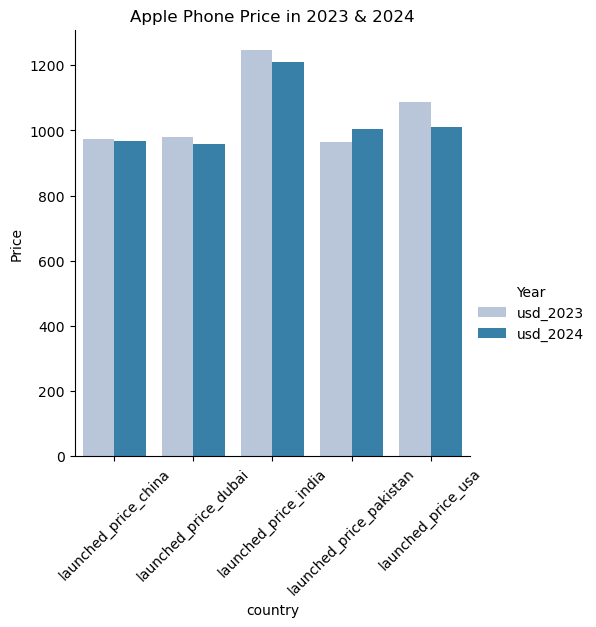

In [43]:
q1_long_df = pd.melt(q1_df, 
        id_vars=['country'],  
        #value_vars = ['2023 (USD)', '2024 (USD)'],
        value_vars=['usd_2023', 'usd_2024'], 
        var_name='Year',   
        value_name='Price')   
q1_long_df
sns.catplot(data = q1_long_df, kind = 'bar', hue = 'Year', x = 'country', y = 'Price', palette='PuBu')
plt.xticks(rotation=45)
plt.title('Apple Phone Price in 2023 & 2024')
plt.show()

### 📃 Textual Explanation:

The table and the graph present the launched prices of Apple products in five different countries/regions: China, Dubai, India, Pakistan, and the USA, for the years 2023 and 2024 (represented in USD).

- **China:** Apple's product prices decreased slightly from \\$972.48 in 2023 to \$966.11 in 2024.
- **Dubai:** A similar trend is observed in Dubai, with prices dropping from \\$979.67 in 2023 to \$959.25 in 2024.
- **India:** India shows the highest prices among the listed regions, with a decrease from \\$1246.80 in 2023 to \$1209.54 in 2024.
- **Pakistan:** Interestingly, Pakistan is the only region where prices increased, going from \\$963.33 in 2023 to \$1003.78 in 2024.
- **USA:** The USA also saw a decrease in prices, from \\$1086.50 in 2023 to \$1011.50 in 2024.

## Answering Question #2:

### 2. Which company provides the best battery capacity and how much do they cost?

### 🗒️ Tabular Representation:

In [44]:
q2_df = df_copy[['company_name','battery_capacity', 'launched_price_usa', 'launched_year']]
q2_df = q2_df[q2_df['launched_year'] == 2024]

battery_pivot = pd.pivot_table(q2_df, values = ['battery_capacity', 'launched_price_usa'], index = 'company_name', aggfunc = 'mean')
for i in battery_pivot.columns:
    battery_pivot[i] = battery_pivot[i].apply(lambda x: round(x, 2))
battery_pivot.reset_index(inplace=True)

battery_tabular = pd.DataFrame.copy(battery_pivot)
battery_tabular.columns = ['Company Name', 'Battery Capacity (mAh)', 'Average Price']
battery_tabular = battery_tabular.style.set_caption('Battery Capacity and Prices in 2024 (USA)')
battery_tabular

,Company Name,Battery Capacity (mAh),Average Price
0,apple,4175.000000,1011.500000
1,google,4957.000000,1109.000000
2,honor,7452.780000,987.890000
3,huawei,5416.670000,1165.000000
4,infinix,5585.000000,339.000000
5,iqoo,8040.000000,424.000000
6,motorola,4689.440000,469.110000
7,oneplus,6962.000000,789.000000
8,oppo,5626.110000,670.670000
9,poco,6283.750000,338.000000


### 📈 Graphical Representation:

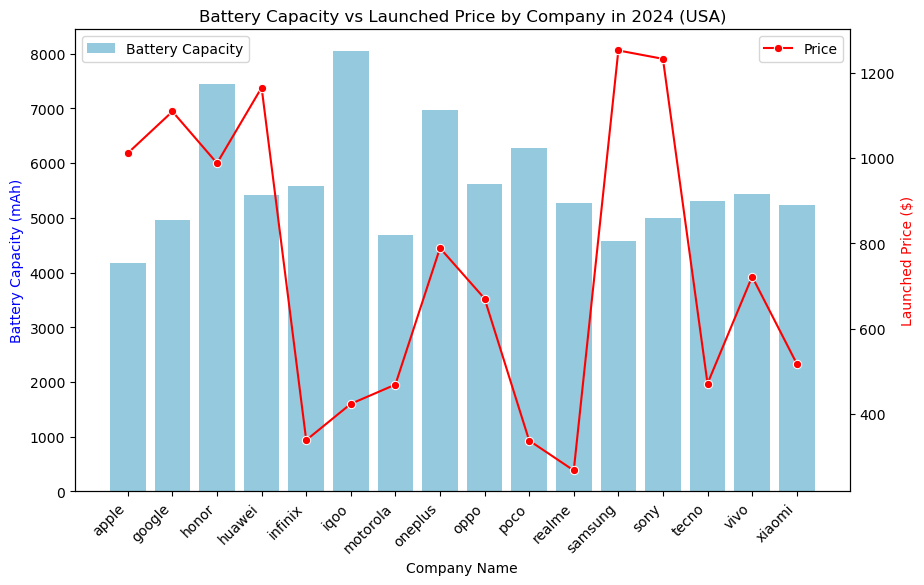

In [45]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barplot for battery capacity
sns.barplot(x='company_name', y='battery_capacity', data=battery_pivot, ax=ax1, color='skyblue', label='Battery Capacity')

# Twin axis for price
ax2 = ax1.twinx()
sns.lineplot(x='company_name', y='launched_price_usa', data=battery_pivot, ax=ax2, color='red', marker='o', label='Price')

# Rotate x labels (Correct way)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Labels and legends
ax1.set_ylabel("Battery Capacity (mAh)", color="blue")
ax2.set_ylabel("Launched Price ($)", color="red")
ax1.set_xlabel("Company Name")
ax1.set_title("Battery Capacity vs Launched Price by Company in 2024 (USA)")

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### 📃 Textual Explanation:
This data shows the battery size and price of different phones in the US.  There's no clear pattern where bigger batteries always mean higher prices.

**Best Value (Big Battery, Low Price):**
- Poco: Has a very large battery (6283 mAh) and a very low price ($338).

**Other Good Options:**
- Infinix & Realme: Also offer good battery size for a low price.

**Expensive with Smaller Batteries:**
- Apple, Samsung, Sony: Have smaller batteries but high prices.

In short: **Poco** is the best if you want a long-lasting battery without spending a lot. Although battery capacity is a testament of a good phone, buyers should also consider other factors such as camera quality, ram, etc.

## END